# Analyze CIA Factbook Data Using SQLite and Python

## Overview of the Data

Work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

* **population** - The population as of 2015.
* **population_growth** - The annual population growth rate, as a percentage.
* **area** - The total land and water area.

Using pandas and matplotlib to display results neatly and visualize them because they let focus on practicing thinking and working in SQL.

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")

# get list of tables
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
conn.execute(q1).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [3]:
# use pandas to run SQL queries:
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [4]:
# returns the first 5 rows of the facts table in the database:
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Summary Statistics

Here are the descriptions for some of the columns:

* **name** - The name of the country.
* **area** - The total land and sea area of the country.
* **population** - The country's population.
* **population_growth** - The country's population growth as a percentage.
* **birth_rate** - The country's birth rate, or the number of births a year per 1,000 people.
* **death_rate** - The country's death rate, or the number of death a year per 1,000 people.
* **area** - The country's total area (both land and water).
* **area_land** - The country's land area in square kilometers.
* **area_water** - The country's waterarea in square kilometers.

Let's start by calculating some summary statistics and look for any outlier countries.

In [6]:
# get minimum population, maximum population, minimum population growth, maximum population growth
q3 = '''
SELECT MIN(population) as 'min population', MAX(population) as 'max population',
MIN(population_growth) as 'min population growth', MAX(population_growth) as 'max population growth'
FROM facts
'''
pd.read_sql_query(q3, conn)

,min population,max population,min population growth,max population growth
0,0,7256490011,0.0,4.02


## Explore Outliers

A few things stick out from the summary statistics in the last screen:

* there's a country with a population of 0
* there's a country with a population of 7256490011 (or more than 7.2 billion people)

Let's zoom in on just these countries.

In [7]:
# get the countrie(s) with a population of 0:
q4 = '''
SELECT name, population
FROM facts
WHERE population = 0
'''
pd.read_sql_query(q4, conn)

,name,population
0,Antarctica,0


In [8]:
# get  countrie(s) with a population of 7256490011:
q5 = '''
SELECT name, population
FROM facts
WHERE population = 7256490011
'''
pd.read_sql_query(q5, conn)

,name,population
0,World,7256490011


There is a row in database with summary information about all countries - World. And there is Antarctica with 0 population.

## Histograms

Let's move on to generating histograms for the rest of the countries in the table, ignoring rows about World and Antarctica.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b43d1d0>,
      dtype=object)

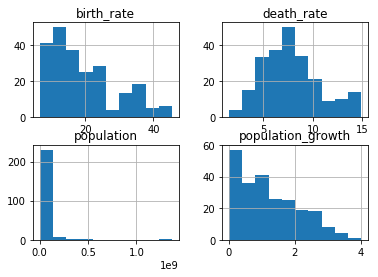

In [13]:
# get population, population_growth, birth_rate, death_rate:
q6 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT MIN(population) FROM facts)
AND population != (SELECT MAX(population) from facts)
'''
data = pd.read_sql_query(q6, conn)

# generate histograms
%matplotlib inline
data.hist()

## Which countries have the highest population density?

In [17]:
# get population density (the ratio of population to land area):
q7 = '''
SELECT name, CAST(population AS float) / CAST(area_land AS float) AS density
FROM facts
ORDER BY density DESC
LIMIT 15
'''
pd.read_sql_query(q7, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


In [22]:
# exit
conn.close()